In [1]:
import os
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import pylab as pl
%pylab inline

import urllib

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
url1 = "https://raw.githubusercontent.com/jazzzchan/PUI2017_yc3300/master/HW5_yc3300/World%20firearms%20murders%20and%20ownership%20-%20Sheet%201.csv"
os.system("curl -0" + url1)
os.system("mv firearm.csv" + os.getenv("PUIDATA"))
data_firearm = pd.read_csv(os.getenv("PUIDATA") + "/" + "firearm.csv")
data_firearm.head()

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0
1,Algeria,DZ,CTS,4.8,20.0,0.06,78.0,7.6,1900000.0
2,Angola,AO,NaN,NaN,NaN,NaN,34.0,17.3,2800000.0
3,Anguilla,AI,WHO-MDB,24.0,1.0,7.14,NaN,NaN,NaN
4,Argentina,AR,Ministry of Justice,52.0,1198.0,3.02,62.0,10.2,3950000.0


In [3]:
data_firearm.columns

Index([u'Country/Territory', u'ISO code', u'Source',
       u'% of homicides by firearm', u'Number of homicides by firearm',
       u'Homicide by firearm rate per 100,000 pop',
       u'Rank by rate of ownership', u'Average firearms per 100 people',
       u'Average total all civilian firearms'],
      dtype='object')

In [4]:
data_firearm.drop(['ISO code','Source','% of homicides by firearm','Homicide by firearm rate per 100,000 pop','Rank by rate of ownership',
                   'Average firearms per 100 people'],axis = 1, inplace = True)
data_firearm.head()
data_firearm = data_firearm.rename(columns={"Country/Territory" :"Country"})


In [5]:
url = 'data:application/octet-stream;charset=utf-8,Country%2CGuns%2F100%20inhabitants%2CNumber%20of%20mass%20shootings%0AAustralia%2C15%2C4%0AAustria%2C30.4%2C1%0ABeligium%2C17.2%2C2%0ACanada%2C30.8%2C4%0ADenmark%2C12%2C0%0AFinland%2C45.3%2C2%0AFrance%2C31.2%2C6%0AGermany%2C30.3%2C7%0AGreece%2C22.5%2C0%0AHolland%2C3.9%2C2%0AHungary%2C5.5%2C0%0AIceland%2C30.3%2C0%0AIreland%2C8.6%2C0%0AItaly%2C11.9%2C0%0AJapan%2C0.6%2C0%0ALuxembourg%2C15.3%2C0%0ANew%20Zealand%2C22.6%2C3%0ANorway%2C31.3%2C1%0APoland%2C1.3%2C0%0APortugal%2C8.5%2C1%0ASpain%2C10.4%2C1%0ASweden%2C31.6%2C2%0ASwitzerland%2C45.7%2C2%0AUnited%20Kingdom%2C6.2%2C3%0AUnited%20States%2C88.8%2C78'
try:
    response = urllib.urlopen(url)
    data_shoot = pd.read_csv(response)

except urllib.HTTPError:
    print('Invalid URL!!!')
    
data_shoot.head()

,Country,Guns/100 inhabitants,Number of mass shootings
0,Australia,15.0,4
1,Austria,30.4,1
2,Beligium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


In [6]:
url3 = 'https://raw.githubusercontent.com/jazzzchan/PUI2017_yc3300/master/HW5_yc3300/API_SP.POP.TOTL_DS2_en_csv_v2.csv'
os.system("curl -0" + url3)
os.system("mv worldpop.csv " + os.getenv("PUIDATA"))
data_pop = pd.read_csv(os.getenv("PUIDATA") + "/" + "worldpop.csv", skiprows = [0,1,2,3])

In [7]:
data_pop.columns

Index([u'Country Name', u'Country Code', u'Indicator Name', u'Indicator Code',
       u'1960', u'1961', u'1962', u'1963', u'1964', u'1965', u'1966', u'1967',
       u'1968', u'1969', u'1970', u'1971', u'1972', u'1973', u'1974', u'1975',
       u'1976', u'1977', u'1978', u'1979', u'1980', u'1981', u'1982', u'1983',
       u'1984', u'1985', u'1986', u'1987', u'1988', u'1989', u'1990', u'1991',
       u'1992', u'1993', u'1994', u'1995', u'1996', u'1997', u'1998', u'1999',
       u'2000', u'2001', u'2002', u'2003', u'2004', u'2005', u'2006', u'2007',
       u'2008', u'2009', u'2010', u'2011', u'2012', u'2013', u'2014', u'2015',
       u'2016', u'Unnamed: 61'],
      dtype='object')

In [8]:
data_pop.drop(['Country Code','Indicator Name','Indicator Code','1960', '1961', '1962', '1963', u'1964', u'1965', u'1966', u'1967',
       '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2013', '2014', '2015',
       '2016', 'Unnamed: 61'],axis=1, inplace= True)
data_pop = data_pop.rename(columns = {"2012":"population"})

In [9]:
data_pop.head()

,Country Name,population
0,Aruba,102577.0
1,Afghanistan,30696958.0
2,Angola,25096150.0
3,Albania,2900401.0
4,Andorra,82431.0


In [10]:
url4='https://raw.githubusercontent.com/jazzzchan/PUI2017_yc3300/master/HW5_yc3300/API_NY.GDP.MKTP.CD_DS2_en_csv_v2.csv'

In [11]:
os.system("curl -O " + url4)
os.system("mv worldgdp.csv " + os.getenv("PUIDATA"))
data_gdp = pd.read_csv(os.getenv("PUIDATA") + "/" + "worldgdp.csv",skiprows = [0,1,2,3])

In [12]:
data_gdp.columns

Index([u'Country Name', u'Country Code', u'Indicator Name', u'Indicator Code',
       u'1960', u'1961', u'1962', u'1963', u'1964', u'1965', u'1966', u'1967',
       u'1968', u'1969', u'1970', u'1971', u'1972', u'1973', u'1974', u'1975',
       u'1976', u'1977', u'1978', u'1979', u'1980', u'1981', u'1982', u'1983',
       u'1984', u'1985', u'1986', u'1987', u'1988', u'1989', u'1990', u'1991',
       u'1992', u'1993', u'1994', u'1995', u'1996', u'1997', u'1998', u'1999',
       u'2000', u'2001', u'2002', u'2003', u'2004', u'2005', u'2006', u'2007',
       u'2008', u'2009', u'2010', u'2011', u'2012', u'2013', u'2014', u'2015',
       u'2016', u'Unnamed: 61'],
      dtype='object')

In [13]:
data_gdp.drop(['Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967',
       '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2013', '2014', '2015',
       '2016', 'Unnamed: 61'], axis =1, inplace = True)
data_gdp = data_gdp.rename(columns = {"2012" : "gdp"})
data_gdp.head()

,Country Name,gdp
0,Aruba,NaN
1,Afghanistan,2.053654e+10
2,Angola,1.153984e+11
3,Albania,1.231978e+10
4,Andorra,3.146152e+09


In [14]:
data_popgdp = data_pop.merge(data_gdp, right_on = "Country Name", left_on = "Country Name")
data_popgdp.head()

,Country Name,population,gdp
0,Aruba,102577.0,NaN
1,Afghanistan,30696958.0,2.053654e+10
2,Angola,25096150.0,1.153984e+11
3,Albania,2900401.0,1.231978e+10
4,Andorra,82431.0,3.146152e+09


In [15]:
data_popgdp = data_popgdp.rename(columns={"Country Name":"Country"})

In [16]:
data_3 = data_firearm.merge(data_popgdp, right_on = "Country", left_on = "Country")
data_3.head()


,Country,Number of homicides by firearm,Average total all civilian firearms,population,gdp
0,Albania,56.0,270000.0,2900401.0,1.231978e+10
1,Algeria,20.0,1900000.0,37565847.0,2.090474e+11
2,Angola,NaN,2800000.0,25096150.0,1.153984e+11
3,Argentina,1198.0,3950000.0,42096739.0,5.459824e+11
4,Armenia,9.0,380000.0,2881922.0,1.061932e+10


In [17]:
df = data_3.merge(data_shoot, right_on = "Country", left_on = "Country")
df.head()

,Country,Number of homicides by firearm,Average total all civilian firearms,population,gdp,Guns/100 inhabitants,Number of mass shootings
0,Australia,30.0,3050000.0,22728254.0,1.538194e+12,15.0,4
1,Austria,18.0,2500000.0,8429991.0,4.074516e+11,30.4,1
2,Canada,173.0,9950000.0,34750545.0,1.824289e+12,30.8,4
3,Denmark,15.0,650000.0,5591572.0,3.271489e+11,12.0,0
4,Finland,24.0,2400000.0,5413971.0,2.567065e+11,45.3,2


In [18]:
len(df)

22

Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


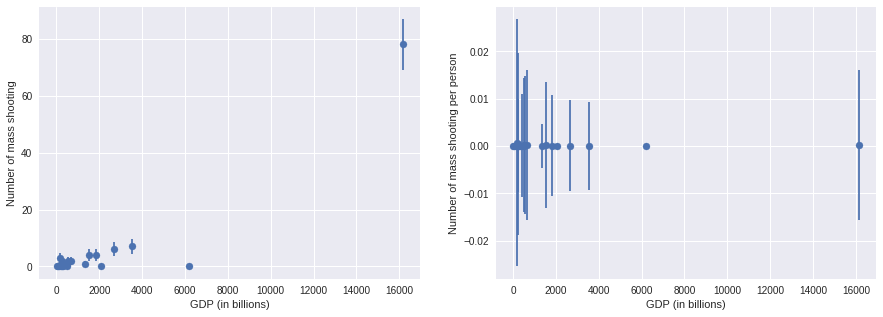

In [19]:
fig = pl.figure(figsize=(15,5)) 


ax1 = fig.add_subplot(121)
scatter1 = ax1.scatter(df.gdp / 1e9, df['Number of mass shootings'])
ax1.errorbar(df.gdp / 1e9, df['Number of mass shootings'], 
            yerr = np.sqrt(df['Number of mass shootings'] * 1.0), fmt = '.')
ax1.set_xlabel("GDP (in billions)")
ax1.set_ylabel("Number of mass shooting")
ax1.set_ylim()


df['shootingspp'] = df["Number of mass shootings"] / df['population'] * 1e3

ax2 = fig.add_subplot(122)
scatter2 = ax2.scatter(df.gdp/1e9,df['shootingspp'] )
ax2.errorbar(df.gdp / 1e9, df['shootingspp'], 
            yerr = np.sqrt(df['shootingspp'] * 1.0), fmt = '.')
ax2.set_xlabel("GDP (in billions)")
ax2.set_ylabel("Number of mass shooting per person")
ax2.set_ylim()


print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")

## Figure 1. Number of mass shootings vs GDP     
US is an outlier which has the highest GDP and the highest number of mass shootings

## Figure 2. Number of mass shooting vs GDP per capita
Again, US is an outlier which has the highest number of mass shootings but not the highest GDP per person

(-13500000.76160481, 283500017.25040442)

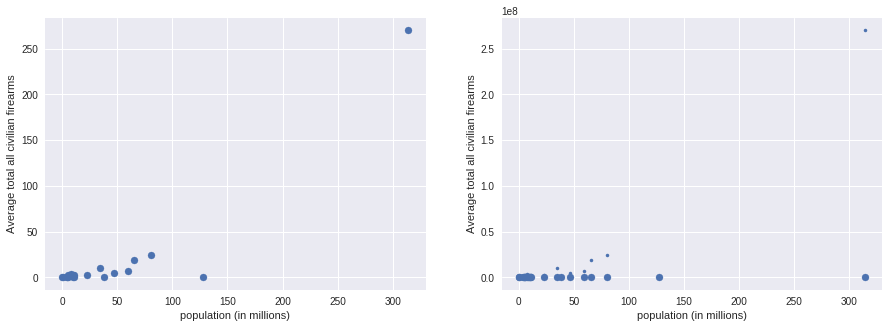

In [20]:
fig = pl.figure(figsize=(15,5)) 
ax1 = fig.add_subplot(121)
scatter1 = ax1.scatter(df.population / 1e6, df['Average total all civilian firearms']/1e6)
ax1.set_xlabel("population (in millions)")
ax1.set_ylabel("Average total all civilian firearms")
ax1.set_ylim()

ax2 = fig.add_subplot(122)
scatter2 = ax2.scatter(df.population / 1e6, df['Average total all civilian firearms']/1e6)
ax2.errorbar(df.population / 1e6, df['Average total all civilian firearms'], 
            yerr = np.sqrt(df['Average total all civilian firearms'] / 1e6 * 1.0), fmt = '.')
ax2.set_xlabel("population (in millions)")
ax2.set_ylabel("Average total all civilian firearms")
ax2.set_ylim()

### Figure 3. Average number of civilian firearms per person (without errors)
US is still an outlier which has the highest number of civilian firearms and the highest population.
### Figure 4. Average number of civilian firearms per person (with errors)
Errors here represent Poisson statistics.

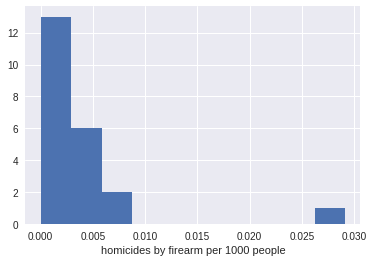

In [21]:
fig, ax = plt.subplots()
ax.hist(df['Number of homicides by firearm'] / df['population'] * 1000)
ax.set_xlabel('homicides by firearm per 1000 people');

### Figure 5. Histogram of the number of homicides by firearm per 1000 person
This shows an outlier with a high average number of homicides by firearms per 1,000 people in their population which has only one occurrence

(-0.86359109323329708, 12.790893846941653)

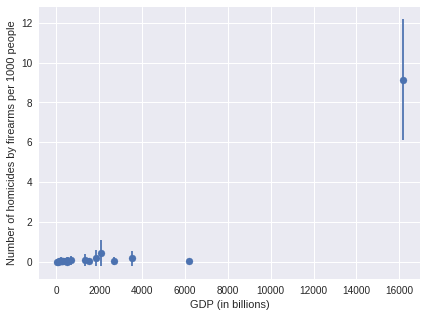

In [22]:
fig = pl.figure(figsize=(15,5))

ax1 = fig.add_subplot(121)
scatter1 = ax1.scatter(df.gdp / 1e9, df['Number of homicides by firearm'] / 1e3)
ax1.errorbar(df.gdp/ 1e9, df['Number of homicides by firearm'] / 1e3, 
            yerr = np.sqrt(df['Number of homicides by firearm'] / 1e3 * 1.0), fmt = '.')
ax1.set_xlabel("GDP (in billions)")
ax1.set_ylabel("Number of homicides by firearms per 1000 people")
ax1.set_ylim()


### Figure 6. Number of homicides by firearms for every 1000 people vs GDP in billions.
Us is an outlier with a high average of homicides by firearms and a high GDP.

In [23]:
df_usa = df[df['Country'] == 'United States']
df_usa

,Country,Number of homicides by firearm,Average total all civilian firearms,population,gdp,Guns/100 inhabitants,Number of mass shootings,shootingspp
21,United States,9146.0,270000000.0,313998379.0,1.615526e+13,88.8,78,0.000248


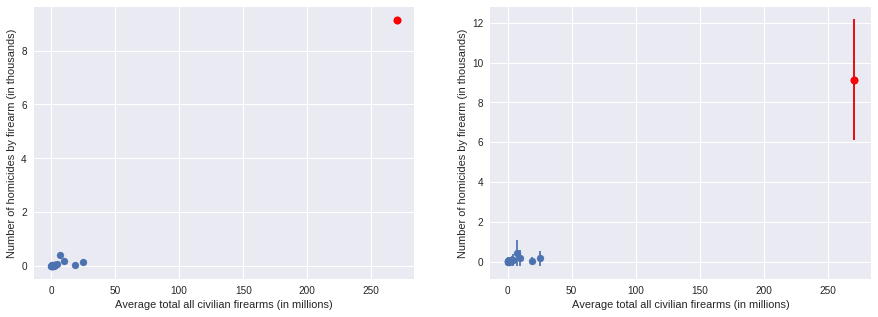

In [24]:
fig = pl.figure(figsize=(15,5))

ax1 = fig.add_subplot(121)
ax1.scatter(df['Average total all civilian firearms'] / 1e6 , df['Number of homicides by firearm'] / 1e3)
ax1.plot(df_usa['Average total all civilian firearms'] / 1e6 , df_usa['Number of homicides by firearm'] / 1e3, 'ro', markersize=8)
ax1.set_xlabel('Average total all civilian firearms (in millions)')
ax1.set_ylabel('Number of homicides by firearm (in thousands)')
ax1.set_ylim();

ax2 = fig.add_subplot(122)
ax2.scatter(df['Average total all civilian firearms'] / 1e6 , df['Number of homicides by firearm'] / 1e3)
ax2.errorbar(df['Average total all civilian firearms'] / 1e6 , df['Number of homicides by firearm'] / 1e3,
            yerr=np.sqrt(df['Number of homicides by firearm'] / 1e3 * 1.0), fmt='.')
ax2.plot(df_usa['Average total all civilian firearms'] / 1e6 , df_usa['Number of homicides by firearm'] / 1e3, 'ro', markersize=8)
ax2.errorbar(df_usa['Average total all civilian firearms'] / 1e6 , df_usa['Number of homicides by firearm'] / 1e3,
            yerr=np.sqrt(df_usa['Number of homicides by firearm'] / 1e3 * 1.0), fmt='.', color='r')
ax2.set_xlabel('Average total all civilian firearms (in millions)')
ax2.set_ylabel('Number of homicides by firearm (in thousands)')
ax2.set_ylim();

### Figure 7. Number of homicides by firearms against Average total civilian firearms  - Without Errors
This figure shows the relationship between the number of homicides by firearms against the average total civilian firearms per country and the US is highlighted in red. It has the highest number of civilian firearms and also the highest number of homicides by firearms.
### Figure 8. Number of homicides by firearms against Average total civilian firearms (in millions) - With Errors
Errors here represent a Poisson statistic.

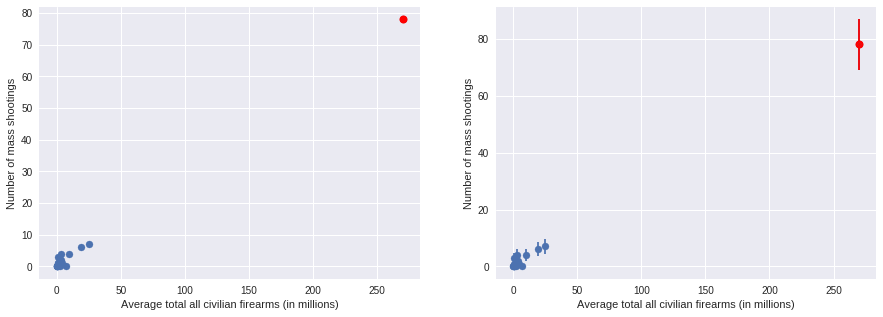

In [25]:
fig = pl.figure(figsize=(15,5))

ax1 = fig.add_subplot(121)
ax1.scatter(df['Average total all civilian firearms'] / 1e6 , df['Number of mass shootings'])
ax1.plot(df_usa['Average total all civilian firearms'] / 1e6 , df_usa['Number of mass shootings'], 'ro', markersize=8)
ax1.set_xlabel('Average total all civilian firearms (in millions)')
ax1.set_ylabel('Number of mass shootings')
ax1.set_ylim();

ax2 = fig.add_subplot(122)
ax2.scatter(df['Average total all civilian firearms'] / 1e6 , df['Number of mass shootings'])
ax2.errorbar(df['Average total all civilian firearms'] / 1e6 , df['Number of mass shootings'],
            yerr=np.sqrt(df['Number of mass shootings'] * 1.0), fmt='.')
ax2.plot(df_usa['Average total all civilian firearms'] / 1e6 , df_usa['Number of mass shootings'], 'ro', markersize=8)
ax2.errorbar(df_usa['Average total all civilian firearms'] / 1e6 , df_usa['Number of mass shootings'],
            yerr=np.sqrt(df_usa['Number of mass shootings'] * 1.0), fmt='.', color='r')
ax2.set_xlabel('Average total all civilian firearms (in millions)')
ax2.set_ylabel('Number of mass shootings')
ax2.set_ylim();

## Figure 9. Number of mass shootings against Average total civilian firearms - without errors
This shows the relationship between the number of mass shootings against the average total civilian firearms per country and the US is highlighted in red. It has the highest number of civilian firearms and also the highest number of mass shootings.
## Figure 10. Number of mass shootings against Average total civilian firearms - With Errors
Errors represent a Poisson statistic.

In [26]:
df['shootingspp'] = df['Number of mass shootings'] / df['population'] * 1e6
df['firearmspp'] = df['Average total all civilian firearms'] / df['population']

In [27]:
lm1= smf.ols(formula='shootingspp ~ firearmspp', data=df).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            shootingspp   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     4.971
Date:                Tue, 17 Oct 2017   Prob (F-statistic):             0.0374
Time:                        23:27:21   Log-Likelihood:                 11.424
No. Observations:                  22   AIC:                            -18.85
Df Residuals:                      20   BIC:                            -16.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0315      0.051      0.612      0.548        -0.076     0.139
firearmspp     0.3911      0.175      2.230      0.037         0.025     0.757
==============================================================================
Omnibus:                       34.840   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.018
Skew:                           2.733   Prob(JB):                     7.71e-20
Kurtosis:                      11.133   Cond. No.                         5.74
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficient of firearms per person is significant.
The inference is that each increase of 10 firearms per person is predicting roughly 3 to 4 mass shootings per million people in average.

In [ ]:
yerror = np.sqrt(df['Number of mass shootings']) / df['population'] * 1e6

wt = list(1.0 / yerror**2)

lm2 = smf.wls(formula='shootingspp ~ firearmspp', data=df, weights = wt ).fit()
lm2.summary()

In [ ]:
p, v = np.polyfit(df['firearmspp'], df['shootingspp'], 1)
print(p, v)

The coefficient of firearms per person is smaller but more significant after accounting for weights.
The adjusted $R^2$ also rise from 0.147 to 0.773, meaning that this could be a better model in predicting their relationship.
The inference is that each increase of 10 firearms per person is predicting roughly 2 to 3 mass shootings per million people in average.

In [ ]:
fig = pl.figure(figsize(15,5))

ax1 = fig.add_subplot(321)
ax1.scatter(df['firearmspp'], df['shootingspp'])
ax1.set_xlabel('Fire arms')
ax1.set_ylabel('Mass shootings')

ax2 = fig.add_subplot(322)
ax2.scatter(df['firearmspp'], df['shootingspp'], label='y')
ax2.plot(df['firearmspp'], lm.predict(), 'r-', label='OLS fit')
ax2.set_xlabel('Fire arms')
ax2.set_ylabel('Mass shootings')
ax2.legend()

ax3 = fig.add_subplot(323)
ax3.errorbar(df['firearmspp'], df['shootingspp'],
             yerr=np.sqrt(df['shootingspp']), label='y', fmt='.')
ax3.plot(df['firearmspp'], lm.predict(), 'r-', label='OLS fit')
ax3.plot(df['firearmspp'], lmw.predict(), 'g-.', label='WLS fit')
ax3.set_xlabel('Fire arms')
ax3.set_ylabel('Mass shootings')
ax3.legend()

ax4 = fig.add_subplot(324)
sns.regplot(x=df['firearmspp'], y=df['shootingspp'], data=df)
ax4.set_xlabel('Fire arms')
ax4.set_ylabel('Mass shootings')

ax5 = fig.add_subplot(325)
ax5.plot(df['shootingspp'], df['shootingspp'] * p + v, '-.',label="numpy.polyfit line: %.2f x + %.2f"%(p, v))
ax5.set_xlabel('Fire arms')
ax5.set_ylabel('Mass shootings')
ax5.legend()
plt.show()

In [ ]:
sm.graphics.influence_plot(lm, alpha=0.05, criterion="cooks")